## 作業:
課程範例以 訓練資料集來檢視，先看一下測試資料特性，再把測試資料集和訓練資料集合併，並回答下列問題，   
目的:讓大家熟悉對應這樣的問題，我們要提取怎樣的函數來進行計算。   

* Q1: 觀察測試(test)資料集和訓練(Train)資料集的變數的差異性?
* Q2: 測試資料集是否有遺失值?
* Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形或數值來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   


In [1]:
#把需要的 library import 進來
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [2]:
#顯示圖形的函數，可不先不用理解，直接用
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [3]:
# 把兩個訓練資料集和測試資料集讀進來

train = pd.read_csv("Titanic_train.csv")
test  = pd.read_csv("Titanic_test.csv")

In [4]:
print("train :",train.columns)
print('')
print("test :",test.columns)

train : Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

test : Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


## Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?

Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?\
Ans1 : the columns named Survived only exists in train data 

## Q2: 測試資料集是否有遺失值?

In [5]:
print(test.isnull().any())
print('')
print(test.isnull().any().sum())

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

3


Ans2 : Age , Fare , Cabin

## Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   

In [122]:
#合併資料
alldata = pd.concat([train, test])
numtrain = len(train)
numtest = len(test)
add = numtrain + numtest 
a = len(alldata)
b = add
if a == b :
    print('yes')

yes


### Cabin

In [7]:
print(len(alldata))
print(alldata['Cabin'].isnull().sum())
print(1014/1309) #the number of null over 60% , this features is not suitable

1309
1014
0.774637127578304


In [134]:
alldata['Cabin'].value_counts()

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
C22 C26            4
F4                 4
                  ..
C132               1
D48                1
C39                1
B24                1
F E46              1
Name: Cabin, Length: 186, dtype: int64

In [135]:
alldata['Cabin_new'] = alldata["Cabin"].apply(lambda x : str(x)[0] if not pd.isnull(x) else 'NoCabin')
alldata["Cabin_new"].unique()

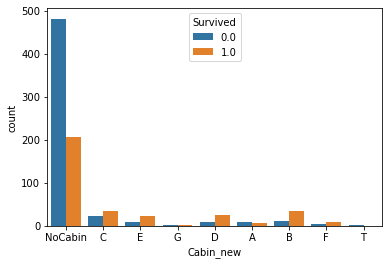

In [145]:
sns.countplot(x=alldata['Cabin_new'], hue=alldata['Survived'])

可見死亡缺失值比較高

### Fare

In [77]:
print(alldata['Fare'].isnull().sum())
#the number of null in Fare is only 1, so just delete it

1


In [78]:
alldata[alldata['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [106]:
new = alldata.dropna(subset=['Fare'])

In [109]:
new[new['PassengerId']>1042].head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
151,1043,NaN,3,"Matinoff, Mr. Nicola",male,NaN,0,0,349255,7.8958,NaN,C
153,1045,NaN,3,"Klasen, Mrs. (Hulda Kristina Eugenia Lofqvist)",female,36.0,0,2,350405,12.1833,NaN,S
154,1046,NaN,3,"Asplund, Master. Filip Oscar",male,13.0,4,2,347077,31.3875,NaN,S
155,1047,NaN,3,"Duquemin, Mr. Joseph",male,24.0,0,0,S.O./P.P. 752,7.5500,NaN,S


### Age

#### 缺失值補零

·補值前
29.881137667304014
14.413493211271334
·補值後
23.87751718869366
17.590844644704124


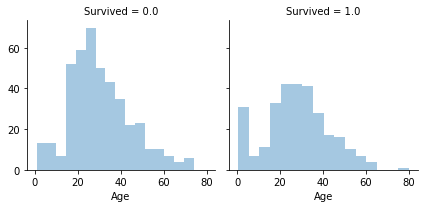

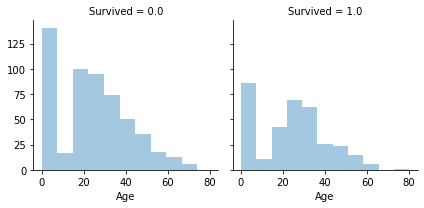

In [129]:
alldata = pd.concat([train, test])

print('·補值前')
print(alldata['Age'].mean())
print(alldata['Age'].std())
g = sns.FacetGrid(alldata,col="Survived")
g.map(sns.distplot,'Age',kde=False)
alldata["Age"] = alldata["Age"].fillna(0)
print('·補值後')
print(alldata['Age'].mean())
print(alldata['Age'].std())
g = sns.FacetGrid(alldata, col='Survived')
g.map(sns.distplot,"Age",kde=False)

補零後，平均數與標準差有差異，也可以看到死亡族群的遺失值較多

#### 平均值補值

·補值前
29.881137667304014
14.413493211271334
·補值後
29.881137667303985
12.883193243702001


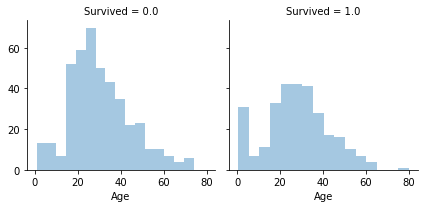

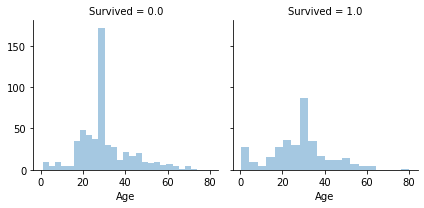

In [128]:
# 連續型用分布圖行來看
alldata = pd.concat([train, test])

print('·補值前')
print(alldata['Age'].mean())
print(alldata['Age'].std())
g = sns.FacetGrid(alldata, col='Survived')
g.map(sns.distplot, 'Age', kde=False)
alldata['Age'] = alldata["Age"].fillna(alldata["Age"].mean())
print('·補值後')
print(alldata['Age'].mean())
print(alldata['Age'].std())
g = sns.FacetGrid(alldata, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

補平均值後，平均數與標準差差異不大，但平均值的人數異常標高，死亡跟存活的圖相比，死亡族群平均值突起較高，可以得知死亡族群遺失值較多

#### 由後往前補

·補值前
29.881137667304014
14.413493211271334
·補值後
29.88771996939556
14.48476368019123


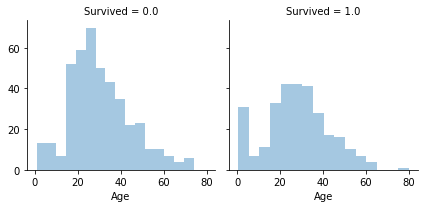

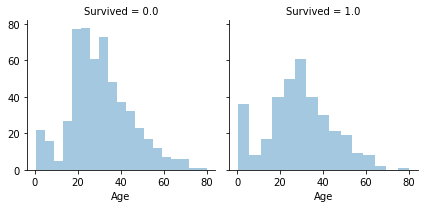

In [127]:
# 連續型用分布圖行來看
alldata = pd.concat([train, test])

print('·補值前')
print(alldata['Age'].mean())
print(alldata['Age'].std())
g = sns.FacetGrid(alldata, col='Survived')
g.map(sns.distplot, 'Age', kde=False)
alldata['Age']=alldata['Age'].fillna(method='bfill')
print('·補值後')
print(alldata['Age'].mean())
print(alldata['Age'].std())
g = sns.FacetGrid(alldata, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

補值後，平均數與標準差相近，且死亡跟存活也符合補值前實際狀況

#### 由前往後補

·補值前
29.881137667304014
14.413493211271334
·補值後
29.75509549274255
14.347469886198386


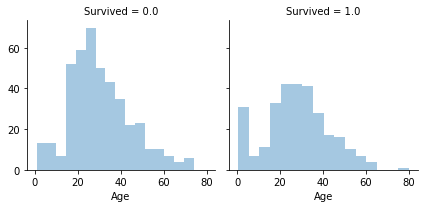

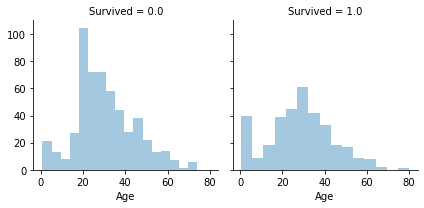

In [132]:
# 連續型用分布圖行來看
alldata = pd.concat([train, test])

print('·補值前')
print(alldata['Age'].mean())
print(alldata['Age'].std())
g = sns.FacetGrid(alldata,col='Survived')
g.map(sns.distplot,'Age',kde=False)

alldata["Age"] = alldata['Age'].fillna(method='pad')

print('·補值後')
print(alldata['Age'].mean())
print(alldata['Age'].std())
g = sns.FacetGrid(alldata, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

補值後，平均數與標準差相近，且死亡跟存活也符合補值前實際狀況